In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import cmath
from numba import njit, f8,i8,c16
import numba
import matplotlib.animation as animation
from IPython.display import HTML
import copy

import sys
sys.path.append('../../lb')
import RungeKutta_acceralated

In [2]:
#パラメーター
nu = 1E-05

f = (1 + 1j) * 5 * 0.001

Dimention = 14 #uの次元数
q = 2
k_0 = 2 ** (-4)
k_n = np.zeros((Dimention+4,1))
k_n[2:-2,0] = [k_0 * q ** (i+1) for i in range(Dimention)]
#print(k_n)

c_n_1 = copy.deepcopy(k_n)[2:-2, 0:]
c_n_1[-2:, 0:] = np.zeros((2,1))
#print(c_n_1)

beta = 0.5
c_n_2 = copy.deepcopy(k_n)[1:-3, 0:] * -beta
c_n_2[-1, 0] = np.zeros((1, 1))
#print(c_n_2)

c_n_3 = copy.deepcopy(k_n)[:-4, 0:] * (beta - 1)
#print(c_n_3)

#parameter = [nu,f,k_n,c_n_1,c_n_2,c_n_3]
parameter = {
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3
}
#print(parameter)
#print(k_n)

In [3]:
#line通知用
import requests
def lineNotify(message):
    line_notify_token = 'm6TH3DJ6bwQxJ2HcGaj4iFLK9LqUWqcL3tktaMWmZlJ'
    line_notify_api = 'https://notify-api.line.me/api/notify'
    payload = {'message': message}
    headers = {'Authorization': 'Bearer ' + line_notify_token} 
    requests.post(line_notify_api, data=payload, headers=headers)

In [4]:
runge_para = {
    'start' :  np.array([
        [0.4350E+00 + 0.5008E+00j],
        [0.1259E+00 + 0.2437E+00j],
        [-0.8312E-01 + -0.4802E-01j],
        [0.5164E-01 + -0.1599E+00j],
        [-0.1899E+00 + -0.3602E-01j],
        [0.4093E-03 + 0.8506E-01j],
        [0.9539E-01 + 0.3215E-01j],
        [-0.5834E-01 + 0.4433E-01j],
        [-0.8790E-02 + 0.2502E-01j],
        [0.3385E-02 + 0.1148E-02j],
        [-0.7072E-04 + 0.5598E-04j],
        [-0.5238E-07 + 0.1467E-06j],
        [0.1E-07 + 0.1E-06j],
        [0.1E-07 + 0.1E-06j]
    ]),
    'step' : 0.0001,
    'period' : (0,5000),
    'nu' : nu,
    'f' : f,
    'k_n' : k_n,
    'c_n_1' : c_n_1,
    'c_n_2' : c_n_2,
    'c_n_3' : c_n_3,
}

CPU times: user 1.65 s, sys: 440 ms, total: 2.09 s
Wall time: 1.29 s


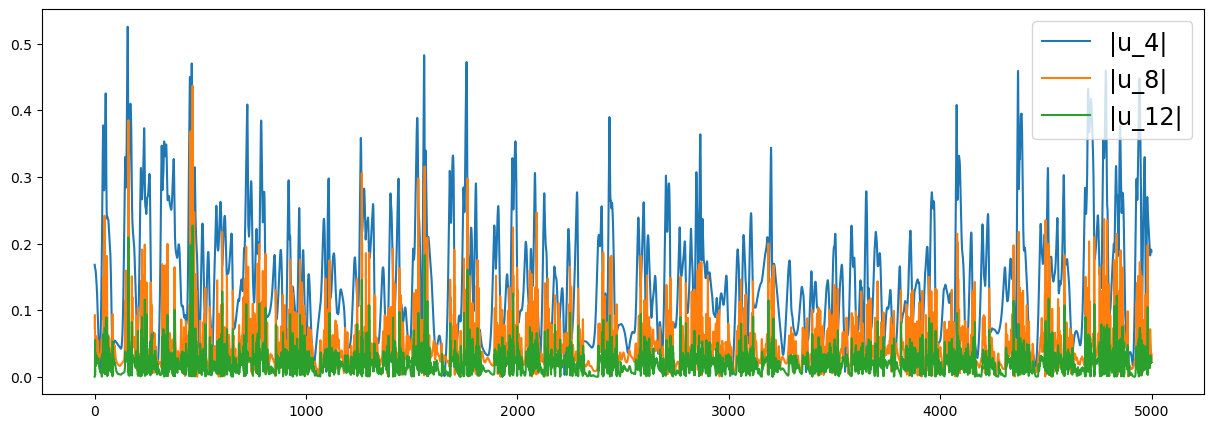

In [13]:
%%time
runge_para['step'] = 1.0E-02

model = RungeKutta_acceralated.RungeKutta()

model.get_arr(**runge_para)
plt.figure(figsize=(15,5))

plt.plot(abs(model.arr[-1,:]),abs(model.arr[3,:]),label="|u_4|") #第4変数
plt.plot(abs(model.arr[-1,:]),abs(model.arr[7,:]),label="|u_8|") #第8変数
plt.plot(abs(model.arr[-1,:]),abs(model.arr[11,:]),label="|u_12|") #第12変数

plt.legend(fontsize = "xx-large", loc = "upper right")

plt.savefig(fname=f"../compare_steps_image/compare step_{runge_para['step']}step_beta{beta}_nu{runge_para['nu']}_time{runge_para['period']}_{Dimention}dim.png")

In [ ]:
del model
del model.arr

#刻み幅0.01の時のc4(上),c5(下)
runge_para["step"] = 0.01
model = RungeKutta_acceralated.RungeKutta()
model.get_arr(**runge_para)
# plt.figure(figsize=(20,10))
# plt.subplot(2,1,1)
# plt.plot(abs(model.arr[-1,:]),abs(model.arr[3,:]))
# plt.subplot(2,1,2)
# plt.plot(abs(model.arr[-1,:]),abs(model.arr[4,:]))

#刻み幅0.005の時のc4(上),c5(下)
runge_para["step"] = 0.005
model = RungeKutta_acceralated.RungeKutta()
model.get_arr(**runge_para)
# plt.figure(figsize=(20,10))
# plt.subplot(2,1,1)
# plt.plot(abs(model.arr[-1,:]),abs(model.arr[3,:]))
# plt.subplot(2,1,2)
# plt.plot(abs(model.arr[-1,:]),abs(model.arr[4,:]))

c40005=abs(model.arr[3,:])
c50005=abs(model.arr[4,:])
t0005=abs(model.arr[-1,:])

#刻み幅0.001の時のc4(上),c5(下)
runge_para["step"] = 0.001
model.get_arr(**runge_para)
# plt.figure(figsize=(20,10))
# plt.subplot(2,1,1)
# plt.plot(abs(model.arr[-1,:]),abs(model.arr[3,:]))
# plt.subplot(2,1,2)
# plt.plot(abs(model.arr[-1,:]),abs(model.arr[4,:]))

c40001=abs(model.arr[3,:])
c50001=abs(model.arr[4,:])
t0001=abs(model.arr[-1,:])

#刻み幅0.0005の時のc4(上),c5(下)
runge_para["step"] = 0.0005
model.get_arr(**runge_para)
# plt.figure(figsize=(20,10))
# plt.subplot(2,1,1)
# plt.plot(abs(model.arr[-1,:]),abs(model.arr[3,:]))
# plt.subplot(2,1,2)
# plt.plot(abs(model.arr[-1,:]),abs(model.arr[4,:]))

c400005=abs(model.arr[3,:])
c500005=abs(model.arr[4,:])
t00005=abs(model.arr[-1,:])

#刻み幅0.0001の時のc4(上),c5(下)
runge_para["step"] = 0.0001
model.get_arr(**runge_para)
# plt.figure(figsize=(20,10))
# plt.subplot(2,1,1)
# plt.plot(abs(model.arr[-1,:]),abs(model.arr[3,:]))
# plt.subplot(2,1,2)
# plt.plot(abs(model.arr[-1,:]),abs(model.arr[4,:]))

c400001=abs(model.arr[3,:])
c500001=abs(model.arr[4,:])
t00001=abs(model.arr[-1,:])

fig=plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.plot(t001,c4001,label="step=0.01")
plt.plot(t00001,c400001,label="step=0.0001")
plt.xlabel("time")
plt.ylabel("|c4|")
plt.legend()

plt.subplot(2,1,2)
plt.plot(t001,c5001,label="step=0.01")
plt.plot(t00001,c500001,label="step=0.0001")
plt.xlabel("time")
plt.ylabel("|c5|")
plt.legend()
plt.show()
fig.savefig(fname="compare_step0.01_step0.0001_nu{nu}_beta{beta}.png")

fig=plt.figure(figsize=(40,20))

plt.subplot(2,1,1)
plt.plot(t0005,c40005,label="step=0.005")
plt.plot(t00001,c400001,label="step=0.0001")
plt.xlabel("time")
plt.ylabel("|c4|")
plt.legend()

plt.subplot(2,1,2)
plt.plot(t0005,c50005,label="step=0.005")
plt.plot(t00001,c500001,label="step=0.0001")
plt.xlabel("time")
plt.ylabel("|c5|")
plt.legend()
plt.show()
fig.savefig(fname=f"compare_step0.005_step0.0001_nu{nu}_beta{beta}.png")

fig=plt.figure(figsize=(40,20))

plt.subplot(2,1,1)
plt.plot(t00005,c400005,label="step=0.0005")
plt.plot(t00001,c400001,label="step=0.0001")
plt.xlabel("time")
plt.ylabel("|c4|")
plt.legend()

plt.subplot(2,1,2)
plt.plot(t00005,c500005,label="step=0.0005")
plt.plot(t00001,c500001,label="step=0.0001")
plt.xlabel("time")
plt.ylabel("|c5|")
plt.legend()
plt.show()
fig.savefig(fname=f"compare_steps_image/compare_step0.0005_step0.0001_nu{nu}_beta{beta}.png")

fig=plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.plot(t0001,c40001,label="step=0.001")
plt.plot(t00001,c400001,label="step=0.0001")
plt.xlabel("time")
plt.ylabel("|c4|")
plt.legend()

plt.subplot(2,1,2)
plt.plot(t0001,c50001,label="step=0.001")
plt.plot(t00001,c500001,label="step=0.0001")
plt.xlabel("time")
plt.ylabel("|c5|")
plt.legend()
plt.show()
fig.savefig(fname=f"compare_steps_image/compare_step0.001_step0.0001_nu{nu}_beta{beta}.png")

message="完了"
Linenotify(message)